# Understanding Decadal Variabilities in sea level

In [2]:
%load_ext ferretmagic

## Pacific Decadal Oscillation (PDO) ( Mantua et al. 1997; Zhang et al. 1997)
### A climatic event which cover vast areas of the Pacific Ocean over periods of 20 to 30 years.
 The PDO has positive and negative phases. The climate impacts experienced during a PDO event can go hand-in-hand with impacts from El Nino or La Nina.  If both phenomena are in the same phase, their associated impacts can be amplified.  In the opposite phase, the associated impacts on global climate may be reduced.

<img src="Images/PDO_phases.jpg" width="600" height="600"> 

*Shown are the PDO behaviors in observations. (a),(b) Regression of SST (°C) and surface wind stress (N m−2) against the (c) PDO index, which is defined as the principal component time series of leading EOF over the North Pacific Ocean (20°–60°N); representing the PDO warm phase in (a) and the PDO cold phase in (b). The principal component time series in (c) is normalized by its standard deviation, thus the amplitudes in (a) and (b) correspond to one standard deviation change of the corresponding principal component time series. The SST is from the ERSST dataset (Smith and Reynolds 2004); the surface wind stress is from 20CRv2 (Compo et al. 2011).*

### PDO index
It is defined by the leading pattern (EOF) of sea surface temperature (SST) anomalies in the North Pacific basin (typically, polewards of 20°N).  The SST anomalies are obtained by removing both the climatological annual cycle and the global-mean SST anomaly from the data at each gridpoint.  Positive values of the PDO index correspond with negative SST anomalies in central and western North Pacific (extending eastwards from Japan), and positive SST anomalies in the eastern North Pacific (along the west coast of North America).  The positive phase of the PDO is also associated with positive SST anomalies across the central and eastern tropical Pacific.


PDO index downloded from - "https://climatedataguide.ucar.edu/climate-data/pacific-decadal-oscillation-pdo-definition-and-indices"
NPGO index downloded from - "http://www.o3d.org/npgo/"

## Load AVISO data and the Decadal indices 

In [3]:
%%ferret
use Data/AVISO_yearly_1x1deg_Global_1993_2019.nc
use Data/AVISO_glo_trend.nc
! Index
use Data/Index/PDO_index.nc
use Data/Index/NPGO_index.nc

### In literature : Han et al., 2019 : Impacts of Basin-Scale Climate Modes on Coastal Sea Level: a Review
 ![aviso sea level](Images/Decadal_sealevel.png)


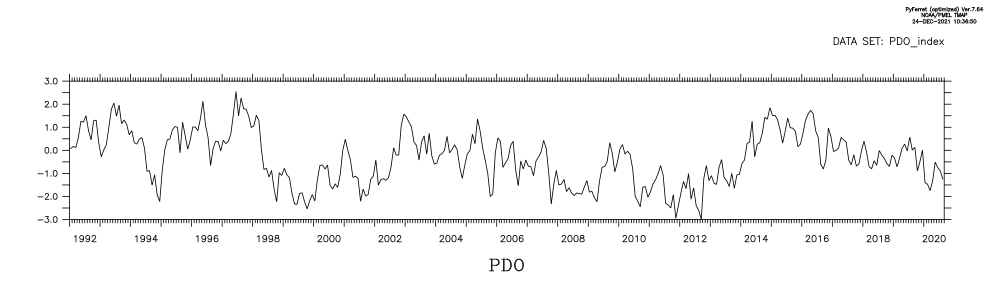

In [4]:
%%ferret -s 1000,300
set region/t=01-jan-1992:31-dec-2020

pl pdo[d=3]

### North Pacific Gyre Oscillation (NPGO; Di Lorenzo et al. 2008)
Chhak et al. (2009) found that the North Pacific Oscillation has an oceanic expression termed the North Pacific Gyre Oscillation (NPGO; Di Lorenzo et al. 2008).

#### North Pacific Oscillation 
<img src="Images/NPO_pattern.png" width="500" height="500"> 
The NPGO is defined as the second EOF of sea surface height anomalies over (180°– 110°W, 25°- 62°N) of the Northeast Pacific.

<img src="Images/NPGO_ssh.png" width="500" height="500">  


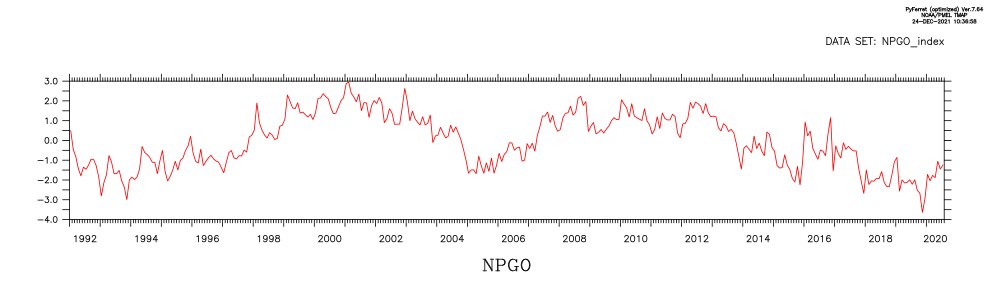

In [6]:
%%ferret -s 1000,300
set region/t=01-jan-1992:31-dec-2020
pl/color=red npgo[d=4]

## Correlation between PDO vs sea level 

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


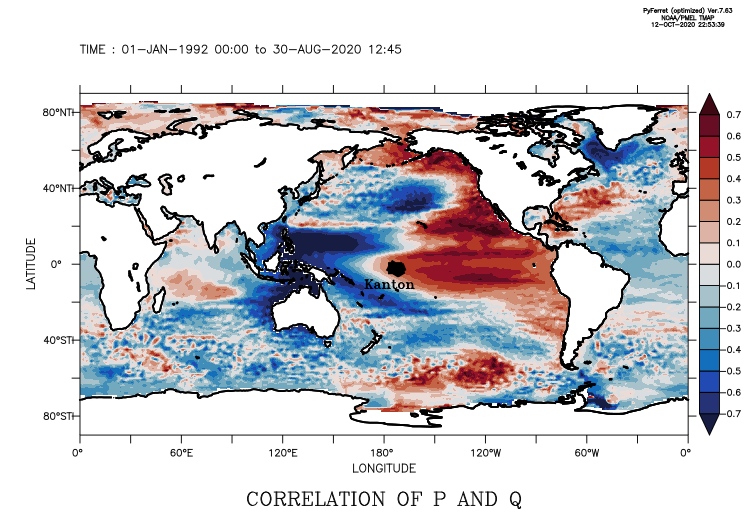

In [18]:
%%ferret
let  p = pdo[l=@sbx:48,d=3] ; let q = sla[d=1,l=@sbx:4,gt=pdo[d=3]] ; go variance 
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ; go land 7
plot/vs/over/nolab/thick=13/sym=88/color=black  lon[d=5],lat[d=5]
label `lon[d=5]-5`,`lat[d=5]-10`,0,0,0.13 @TRKanton

## Regression between PDO vs sea level 

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


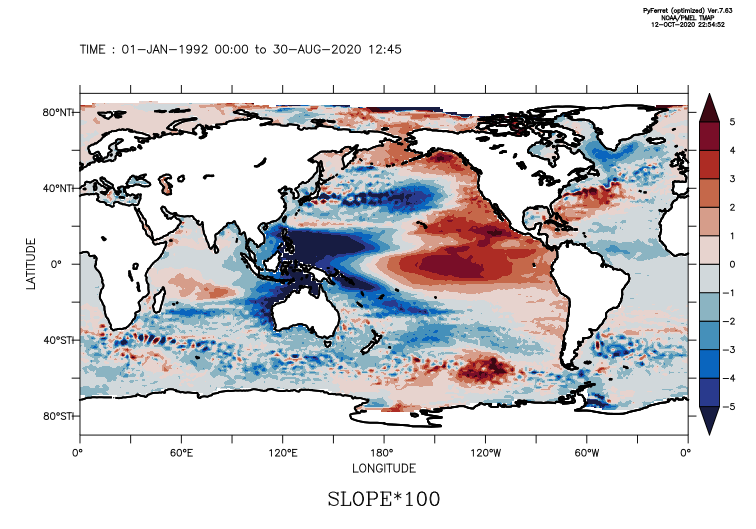

In [23]:
%%ferret
let P = pdo[l=@sbx:48,d=3] ; let q = sla[d=1,l=@sbx:4,gt=pdo[d=3]] ; go regresst
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-5,5,1)(inf) slope*100
go land 7

## Time series comparison between PDO and a location at West Pacific


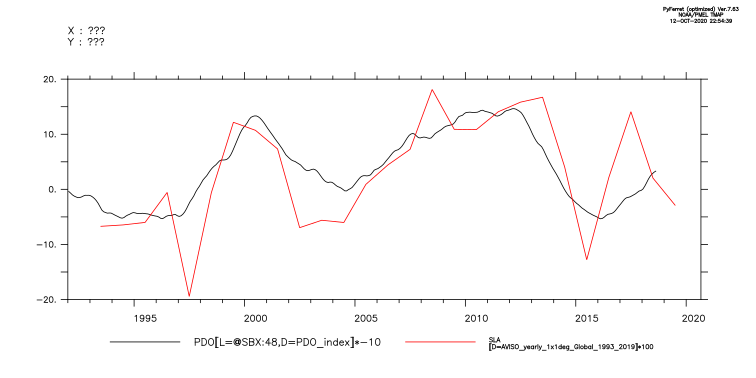

In [22]:
%%ferret
set win/asp=.5
plot/x=140/y=10 pdo[l=@sbx:48,d=3]*-10,sla[d=1]*100

## Correlation between NPGO vs sea level 

! Enter_GO variance
... Variance and Covariance: Instructions:
Use the LET/QUIET command to define the variable(s) P (and Q) as
your variable(s) of interest (e.g. yes? LET/QUIET P = u[x=180,y=0])
The variance of P will be variable P_VAR (Q --> Q_VAR)
The covariance will be COVAR The correlation will be CORREL.
Type GO VAR_N to obtain n/n+1 statistical correction factor
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


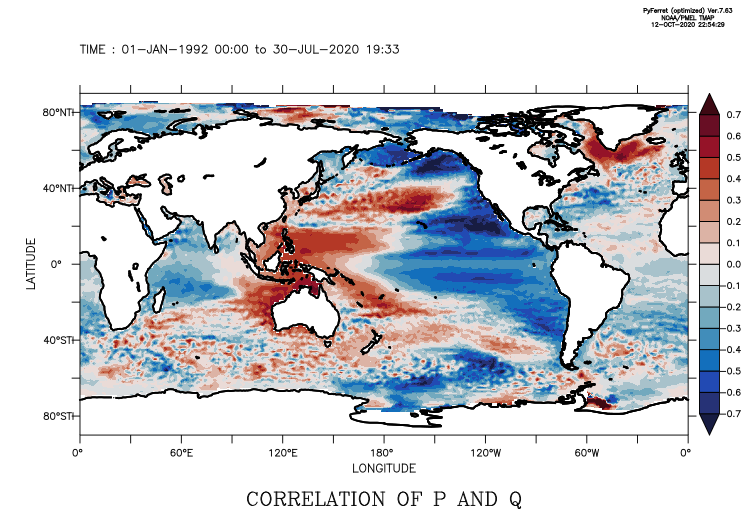

In [20]:
%%ferret
let p = npgo[l=@sbx:48,d=4] ; let q = Sla[d=1,l=@sbx:4,gt=npgo[d=4]] ;go variance
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-0.7,0.7,0.1)(inf) correl ;go land 7

## Regression between NPGO vs sea level 

! Enter_GO regresst
... Linear Regression Along the T Axis
... Instructions:
Use the LET command to define new variables
Define the variable P as your independent (X) variable
Define the variable Q as your dependent (Y) variable
Results will be variables "SLOPE", "INTERCEP" and "RSQUARE"
QHAT will be the regression estimate
Note: If "T" is your independent variable then
... "SET GRID Q" after defining Q.
...
! Exit_GO
! Enter_GO land 7
! Exit_GO


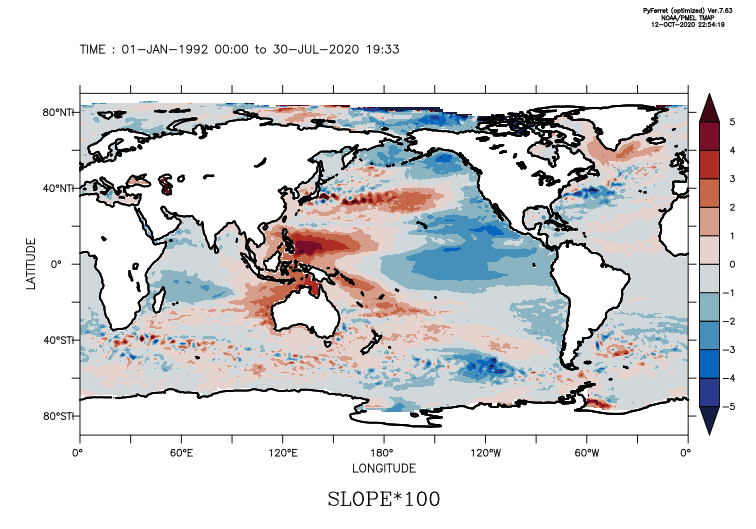

In [19]:
%%ferret
let p = npgo[l=@sbx:48,d=4] ; let q = Sla[d=1,l=@sbx:4,gt=npgo[d=4]] ; go regresst
set win/asp=.7
palette cmocean_balance
fill/lev=(-inf)(-5,5,1)(inf) slope*100 ; go land 7

#### References : 
* Di Lorenzo E, Schneider N, Cobb K, Franks P, Chhak K, Miller A, Mcwilliams J, Bograd S, Arango H, Curchitser E (2008) North Pacific Gyre Oscillation links ocean climate and ecosystem change. Geophys Res Lett 35:L08607.
* Ceballos, L. I., Di Lorenzo, E., Hoyos, C. D., Schneider, N., & Taguchi, B. (2009). North Pacific Gyre Oscillation Synchronizes Climate Fluctuations in the Eastern and Western Boundary Systems, Journal of Climate, 22(19), 5163-5174
* W. Han, D. Stammer, P. Thompson, T. Ezer, H. Palanisamy, X. Zhang, C. M. Domingues, L. Zhang, D. Yuan, Impacts of Basin-Scale Climate Modes on Coastal Sea Level: a Review (Springer Netherlands, 2019; https://doi.org/10.1007/s10712-019-09562-8), vol. 40.
* Mantua NJ, Hare SR, Zhang Y, Wallace JM, Francis RC (1997) A Pacific interdecadal climate oscillation with impacts on salmon production. Bull Am Meteorol Soc 78(6):1069–1079
* Zhang Y, Wallace JM, Battisti DS (1997) ENSO-like interdecadal variability: 1900–93. J Clim 10(5):1004–1020